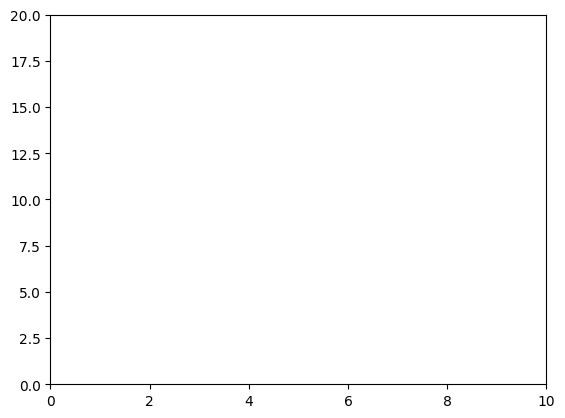

In [22]:
import collections
import random
import string
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class KeyValueQueue:
    def __init__(self):
        self.queue = collections.deque()

    def insert(self, key, value):
        self.queue.append((key, value))

    def extract(self):
        if self.queue:
            return self.queue.popleft()
        else:
            return None

def generate_random_key():
    return random.randint(0, 2**32 - 1)

def generate_random_string(length=10):
    letters = string.ascii_letters + string.digits
    return ''.join(random.choice(letters) for _ in range(length))

def generate_random_key_value_pairs(num_pairs):
    key_value_pairs = []
    for _ in range(num_pairs):
        key = generate_random_key()
        value = generate_random_string()
        key_value_pairs.append((key, value))
    return key_value_pairs

num_pairs = 20
key_value_pairs = generate_random_key_value_pairs(num_pairs)

queue = KeyValueQueue()

for pair in key_value_pairs:
    queue.insert(pair[0], pair[1])

bucket_queues = {}
index = {}

fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(0, 20)
bars = ax.bar([], [], align='edge')

def animate(frame):
    extracted_pair = queue.extract()
    if extracted_pair is not None:
        original_key = extracted_pair[0]
        hashed_key = hash(original_key)
        binary_hashed_key = bin(hashed_key & 0xFFFFFFFF)[2:]
        bucket_key = binary_hashed_key[:10]
        leftover_lsbs = binary_hashed_key[10:]

        if bucket_key not in bucket_queues:
            bucket_queues[bucket_key] = KeyValueQueue()
        
        bucket_queues[bucket_key].insert(leftover_lsbs, extracted_pair[1])
        index[original_key] = (bucket_key, leftover_lsbs)
    
    bucket_counts = [len(bucket_queues.get(str(i), [])) for i in range(10)]
    for i, bar in enumerate(bars):
        bar.set_height(bucket_counts[i])
    
    return bars

anim = FuncAnimation(fig, animate, frames=num_pairs, repeat=False)
plt.show()
